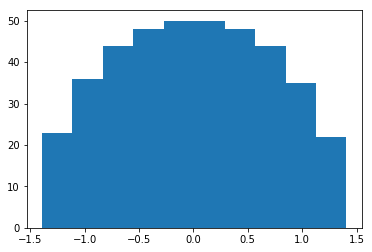

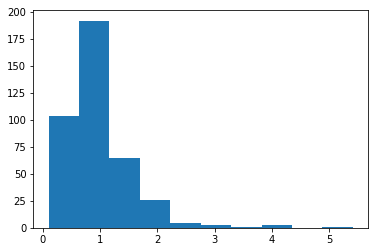

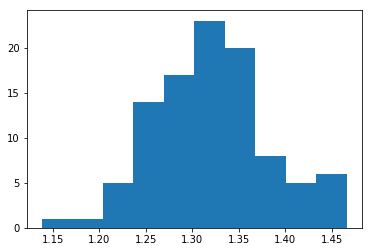

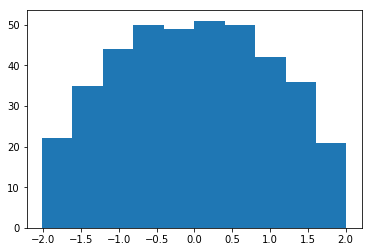

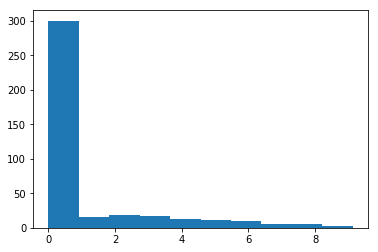

In [40]:
import numpy as np
import random as random
import matplotlib.pyplot as plt

def draw_from_GOE(n):
    return_value=np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            to_assign=random.gauss(0,1)
            return_value[i][j]=to_assign
            return_value[j][i]=to_assign
        to_assign=random.gauss(0,1)*np.sqrt(2)
        return_value[i][i]=to_assign
    return return_value

def draw_from_GUE(n):
    return_value=np.zeros((n,n))+1j*np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            to_assign_real=random.gauss(0,.5)
            to_assign_imag=random.gauss(0,.5)
            return_value[i][j]=to_assign_real+1j*to_assign_imag
            return_value[j][i]=to_assign_real-1j*to_assign_imag
        to_assign=random.gauss(0,1)
        return_value[i][i]=to_assign
    return return_value

def draw_from_MP(n,m):
    aMatrix=np.random.randn(n,m)
    return 1/m*np.dot(aMatrix,np.transpose(aMatrix))

def get_eigenvals(n,ensemble,m=1):
    if ensemble=='GUE':
        eigvals=np.linalg.eigvals(draw_from_GUE(n))
        eigvals=np.real(eigvals)/(np.sqrt(n))
    elif ensemble=='GOE':
        eigvals=np.linalg.eigvals(draw_from_GOE(n))
        eigvals=np.real(eigvals)/(np.sqrt(n))
    elif ensemble=='MP':
        eigvals=np.linalg.eigvals(draw_from_MP(n,m))
        eigvals=np.real(eigvals)
    else:
        eigvals=[]
    return eigvals

def plot_eigenvalue_hist(n,ensemble,m=1):
    eigvals=get_eigenvals(n,ensemble,m)
    plt.hist(eigvals)
    plt.show()

def plot_level_spacing_hist(n,ensemble,m=1):
    eigvals=get_eigenvals(n,ensemble,m)
    eigvals=sorted(eigvals)
    spacings=np.diff(eigvals)
    normalized_spacings=spacings/(np.average(spacings))
    plt.hist(normalized_spacings)
    plt.show()

def plot_extreme_eig_hist(n,ensemble,num_samples,m=1):
    largest_eigvals=np.zeros(num_samples)
    for i in range(num_samples):
        current_largest=sorted(get_eigenvals(n,ensemble,m))[-1]
        largest_eigvals[i]=current_largest
    plt.hist(largest_eigvals)
    plt.show()
    
plot_eigenvalue_hist(400,'GUE')
plot_level_spacing_hist(400,'GUE')
plot_extreme_eig_hist(40,'GUE',100)
plot_eigenvalue_hist(400,'GOE')
plot_eigenvalue_hist(400,'MP',100)